HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

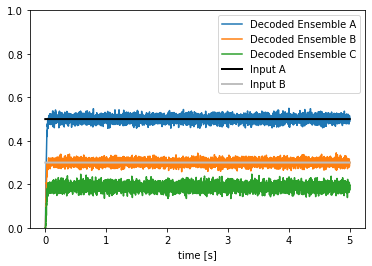

In [2]:
import nengo
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
from nengo.utils.filter_design import cont2discrete


# Create the model object
model = nengo.Network(label='Addition')

with model:
    # Create input nodes representing constant values
    input_a = nengo.Node(output=0.5)
    input_b = nengo.Node(output=0.3)
    
    # Create 3 ensembles each containing 100 leaky integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)
    C = nengo.Ensemble(100, dimensions=1)
    

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(input_a, A)
    nengo.Connection(input_b, B)

    # Connect input ensembles A and B to output ensemble C
    nengo.Connection(A, C)
    nengo.Connection(B, C,transform = -1)    
    
    # Probe
    input_a_probe = nengo.Probe(input_a)
    input_b_probe = nengo.Probe(input_b)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    C_probe = nengo.Probe(C, synapse=0.01)
    
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)
    

# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(
    sim.trange(),
    sim.data[A_probe],
    label="Decoded Ensemble A")
plt.plot(
    sim.trange(),
    sim.data[B_probe],
    label="Decoded Ensemble B")
plt.plot(
    sim.trange(),
    sim.data[C_probe],
    label="Decoded Ensemble C")
plt.plot(
    sim.trange(),
    sim.data[input_a_probe],
    label="Input A",
    color='k',
    linewidth=2.0)
plt.plot(
    sim.trange(),
    sim.data[input_b_probe],
    label="Input B",
    color='0.75',
    linewidth=2.0)
plt.legend()
plt.ylim(0, 1)
plt.xlabel('time [s]');